In [1]:
# Zadanie 1: Znalezienie minimum funkcji dwóch zmiennych (x, y)
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Funkcja celu: f(x, y) = x^2 + y^2
def f(x, y):
    return x**2 + y**2

# Gradient funkcji
def grad_f(x, y):
    return np.array([2*x, 2*y])


In [3]:
# Parametry startowe
x, y = 4.0, -3.0  # punkt początkowy
alpha = 0.1       # krok uczenia
epochs = 50       # liczba iteracji

# Historia punktów
trajectory = [(x, y)]

for i in range(epochs):
    grad = grad_f(x, y)
    x -= alpha * grad[0]
    y -= alpha * grad[1]
    trajectory.append((x, y))

trajectory = np.array(trajectory)


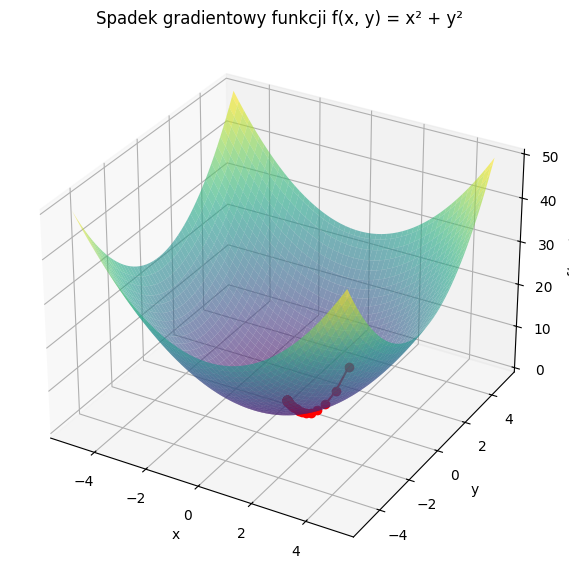

In [4]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Siatka do wykresu
X = np.linspace(-5, 5, 100)
Y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(X, Y)
Z = f(X, Y)

# Rysowanie powierzchni funkcji
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.6)

# Rysowanie ścieżki spadku gradientowego
Z_traj = f(trajectory[:, 0], trajectory[:, 1])
ax.plot(trajectory[:, 0], trajectory[:, 1], Z_traj, color='red', marker='o')

ax.set_title("Spadek gradientowy funkcji f(x, y) = x² + y²")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x, y)")
plt.show()


In [5]:
# Zadanie 2: Wsteczna propagacja błędu w sieci neuronowej
import numpy as np

In [6]:
# Dane wejściowe i wyjściowe (XOR-like)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Inicjalizacja wag
np.random.seed(0)
W1 = np.random.randn(2, 2)  # wejście -> warstwa ukryta
b1 = np.zeros((1, 2))
W2 = np.random.randn(2, 1)  # warstwa ukryta -> wyjście
b2 = np.zeros((1, 1))

# Funkcja aktywacji: sigmoid + pochodna
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)


In [7]:
# Propagacja w przód
z1 = X @ W1 + b1
a1 = sigmoid(z1)
z2 = a1 @ W2 + b2
a2 = sigmoid(z2)

# Błąd
loss = y - a2

# Wsteczna propagacja
dz2 = loss * sigmoid_derivative(z2)
dW2 = a1.T @ dz2
db2 = np.sum(dz2, axis=0, keepdims=True)

dz1 = dz2 @ W2.T * sigmoid_derivative(z1)
dW1 = X.T @ dz1
db1 = np.sum(dz1, axis=0, keepdims=True)

print("Gradienty:")
print("dW1 =", dW1)
print("db1 =", db1)
print("dW2 =", dW2)
print("db2 =", db2)


Gradienty:
dW1 = [[-0.00341382 -0.00335098]
 [ 0.01802458  0.00122409]]
db1 = [[-0.03750792  0.0243876 ]]
dW2 = [[-0.10012408]
 [-0.0965125 ]]
db2 = [[-0.14912546]]
